In [1]:
# companies & employees stats 
#
# 26 June 2024
# marieke.van.erp@dh.huc.knaw.nl

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_93975/372026245.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
company_data = pd.read_csv('company_employees.tsv', sep='\t')
company_data['occurrence_companies'] = company_data.groupby('company.value')['company.value'].transform('size')
company_data.head()

,Unnamed: 0,company.value,companyLabel.xml:lang,companyLabel.value,numEmployees.value,point.value,occurrence_companies
0,0,http://www.wikidata.org/entity/Q2283,en,Microsoft,140768,2018-06-30T00:00:00Z,10
1,1,http://www.wikidata.org/entity/Q2283,en,Microsoft,114000,2016-06-30T00:00:00Z,10
2,2,http://www.wikidata.org/entity/Q2283,en,Microsoft,181000,2021-06-30T00:00:00Z,10
3,3,http://www.wikidata.org/entity/Q2283,en,Microsoft,221000,2022-01-01T00:00:00Z,10
4,4,http://www.wikidata.org/entity/Q2283,en,Microsoft,144000,2019-06-30T00:00:00Z,10


In [3]:
# General stats of the dataset 
# Unique number of values 
company_data.nunique()

Unnamed: 0               12922
company.value             5666
companyLabel.xml:lang        1
companyLabel.value        5643
numEmployees.value        3995
point.value                621
occurrence_companies        36
dtype: int64

In [4]:
company_data['occurrence_companies'].std()

11.122781293712235

In [5]:
company_data['occurrence_companies'].min()

1

In [6]:
company_data['occurrence_companies'].max()

58

In [7]:
company_data['occurrence_companies'].mean()

7.319145643089305

In [8]:
company_data['occurrence_companies'].median()

2.0

In [9]:
# companies & employees plots
#
# 10 July 2024
# jiaqi.zhu@dh.huc.knaw.nl


# Convert datetime to date  
company_data = company_data.assign(**company_data[['point.value']].apply(pd.to_datetime, yearfirst=True, errors='coerce'))
company_data['date'] = company_data['point.value'].dt.date
# Convert numEmployees.value from string to numeric 
company_data = company_data.assign(**company_data[['numEmployees.value']].apply(pd.to_numeric, errors='coerce'))
company_data.head()

,Unnamed: 0,company.value,companyLabel.xml:lang,companyLabel.value,numEmployees.value,point.value,occurrence_companies,date
0,0,http://www.wikidata.org/entity/Q2283,en,Microsoft,140768.0,2018-06-30 00:00:00+00:00,10,2018-06-30
1,1,http://www.wikidata.org/entity/Q2283,en,Microsoft,114000.0,2016-06-30 00:00:00+00:00,10,2016-06-30
2,2,http://www.wikidata.org/entity/Q2283,en,Microsoft,181000.0,2021-06-30 00:00:00+00:00,10,2021-06-30
3,3,http://www.wikidata.org/entity/Q2283,en,Microsoft,221000.0,2022-01-01 00:00:00+00:00,10,2022-01-01
4,4,http://www.wikidata.org/entity/Q2283,en,Microsoft,144000.0,2019-06-30 00:00:00+00:00,10,2019-06-30


In [10]:
# Companies with at least 20 data points 
#54 http://www.wikidata.org/entity/Q9401       BASF
#  52 http://www.wikidata.org/entity/Q552581     SAP
#  52 http://www.wikidata.org/entity/Q2311       Airbus Group
#  52 http://www.wikidata.org/entity/Q2104551    Porsche Automobil Holding SE
#  52 http://www.wikidata.org/entity/Q136542     Hochtief
#  48 http://www.wikidata.org/entity/Q1052186    Cewe Stiftung & Co. KGaA
#  40 http://www.wikidata.org/entity/Q1329236    Finlayson
#  38 http://www.wikidata.org/entity/Q10786832   Alza.cz
#  36 http://www.wikidata.org/entity/Q17221821   7-Eleven, Inc.
#  36 http://www.wikidata.org/entity/Q1550912    GMV Innovating Solutions
#  34 http://www.wikidata.org/entity/Q478214     Tesla, Inc.
#  33 http://www.wikidata.org/entity/Q157645     Deutsche Post AG
#  32 http://www.wikidata.org/entity/Q15123983   Transport Company of the town of České Budějovice
#  30 http://www.wikidata.org/entity/Q941127     Salesforce
#  29 http://www.wikidata.org/entity/Q81230      Siemens
#  28 http://www.wikidata.org/entity/Q9325       Lufthansa
#  28 http://www.wikidata.org/entity/Q644304     EnBW
#  28 http://www.wikidata.org/entity/Q29637      Škoda Auto
#  26 http://www.wikidata.org/entity/Q9396       Deutsche Telekom
#  26 http://www.wikidata.org/entity/Q58205825   DEK
#  26 http://www.wikidata.org/entity/Q3895       Adidas AG
#  26 http://www.wikidata.org/entity/Q25051733   CPI Property Group
#  26 http://www.wikidata.org/entity/Q23014836   HelloFresh
#  26 http://www.wikidata.org/entity/Q201691     Beiersdorf
#  25 http://www.wikidata.org/entity/Q487292     Allianz SE
#  25 http://www.wikidata.org/entity/Q411528     Aixtron SE
#  25 http://www.wikidata.org/entity/Q265273     Freenet AG
#  24 http://www.wikidata.org/entity/Q23384493   Delivery Hero
# 22 http://www.wikidata.org/entity/Q58219536   Continental HT Tyres
#  22 http://www.wikidata.org/entity/Q58197136   Continental výroba pneumatik
#  22 http://www.wikidata.org/entity/Q26794476   Redcare Pharmacy
#  20 http://www.wikidata.org/entity/Q937993     Motor Sich
#  20 http://www.wikidata.org/entity/Q757307     Atlassian
#  20 http://www.wikidata.org/entity/Q15856148   ČGS Holding
#  20 http://www.wikidata.org/entity/Q1184978    Delticom

# companies that have more than 30 datapoints
basf = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q9401")]
sap = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q552581")]
airbus = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q2311")]
porsche = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q2104551")]
hochtief = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q136542")]
cewe = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q1052186")]
finlayson = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q1329236")]
alza = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q10786832")]
seveneleven = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q17221821")]
gmv = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q1550912")]
tesla = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q478214")]  
deutschepost = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q157645")]
csekebudejovice = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q15123983")]
salesforce = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q941127")]

In [11]:
basf_sorted = basf.sort_values('date', ascending=True)

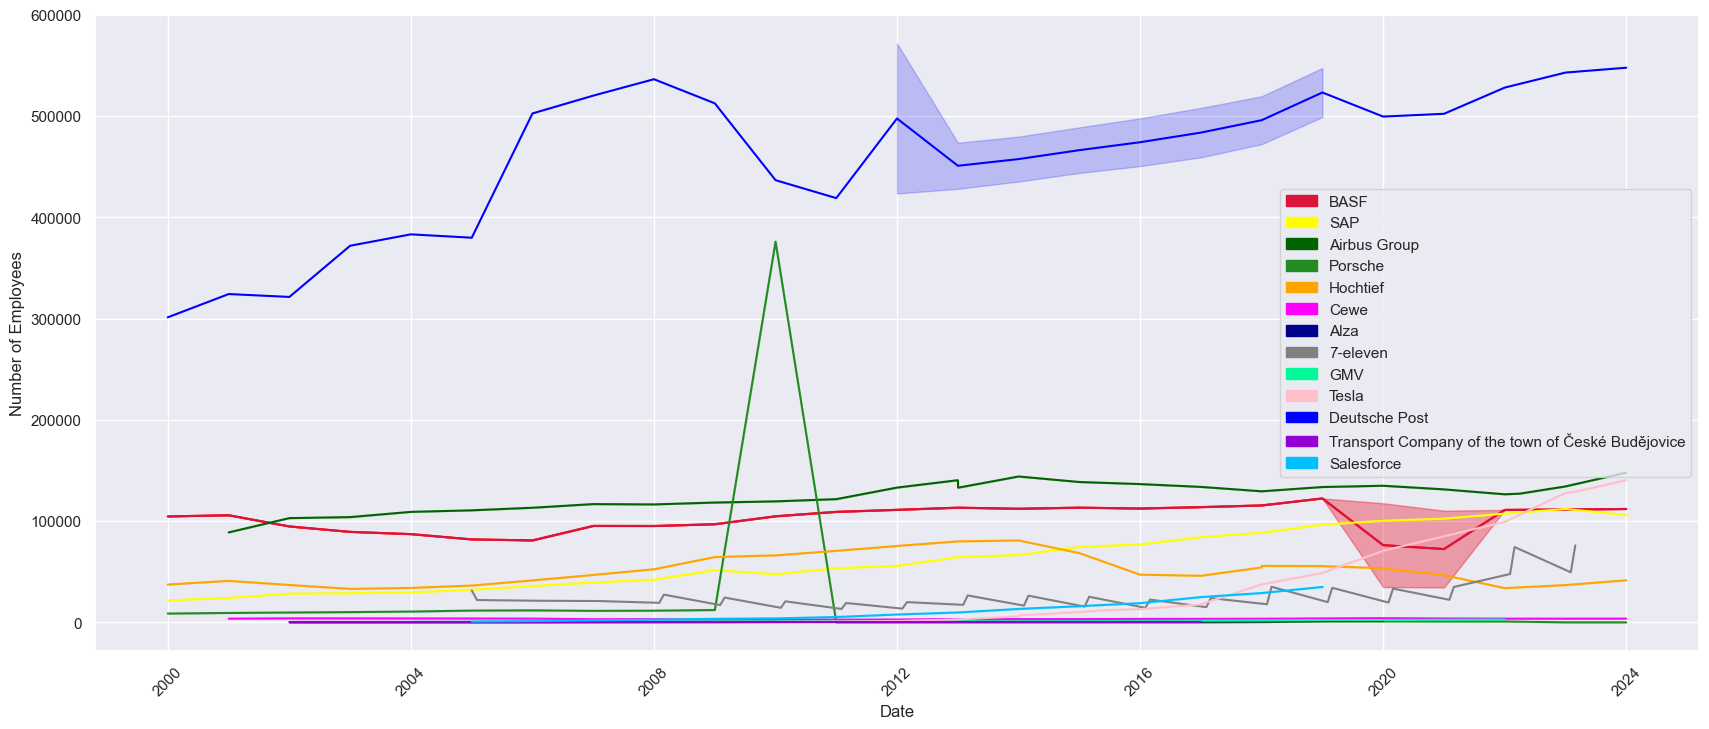

In [13]:
# create line plot
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.lineplot(data=basf_sorted, x = basf_sorted['date'], y=basf_sorted['numEmployees.value'], color='red')

sns.lineplot(x='date', y='numEmployees.value', data=basf, color='crimson') 
sns.lineplot(x='date', y='numEmployees.value', data=sap, color='yellow') 
sns.lineplot(x='date', y='numEmployees.value', data=airbus, color='darkgreen') 
sns.lineplot(x='date', y='numEmployees.value', data=porsche, color='forestgreen') 
sns.lineplot(x='date', y='numEmployees.value', data=hochtief, color='orange') 
sns.lineplot(x='date', y='numEmployees.value', data=cewe, color='magenta') 
#sns.lineplot(x='date', y='numEmployees.value', data=finlayson, color='goldenrod') 
sns.lineplot(x='date', y='numEmployees.value', data=alza, color='darkblue') 
sns.lineplot(x='date', y='numEmployees.value', data=seveneleven, color='gray') 
sns.lineplot(x='date', y='numEmployees.value', data=gmv, color='mediumspringgreen') 
sns.lineplot(x='date', y='numEmployees.value', data=tesla, color='pink') 
sns.lineplot(x='date', y='numEmployees.value', data=deutschepost, color='blue') 
sns.lineplot(x='date', y='numEmployees.value', data=csekebudejovice.sort_values('date', ascending=True), color='darkviolet') 
sns.lineplot(x='date', y='numEmployees.value', data=salesforce, color='deepskyblue') 

plt.xticks(rotation=45)
ax.set(xlabel='Date', ylabel='Number of Employees', title='')
basf_patch = mpatches.Patch(color='crimson', label='BASF')
sap_patch = mpatches.Patch(color='yellow', label='SAP')
airbus_patch = mpatches.Patch(color='darkgreen', label='Airbus Group')
porsche_patch = mpatches.Patch(color='forestgreen', label='Porsche')
hochtief_patch = mpatches.Patch(color='orange', label='Hochtief')
cewe_patch = mpatches.Patch(color='magenta', label='Cewe')
finlayson_patch = mpatches.Patch(color='goldenrod', label='Finlayson')
alza_patch = mpatches.Patch(color='darkblue', label='Alza')
seveneleven_patch = mpatches.Patch(color='gray', label='7-eleven')
gmv_patch = mpatches.Patch(color='mediumspringgreen', label='GMV')
tesla_patch = mpatches.Patch(color='pink', label='Tesla')
deutschepost_patch = mpatches.Patch(color='blue', label='Deutsche Post')
csekebudejovice_patch = mpatches.Patch(color='darkviolet', label='Transport Company of the town of České Budějovice')
salesforce_patch = mpatches.Patch(color='deepskyblue', label='Salesforce') 

ax.legend(handles=[basf_patch, sap_patch, airbus_patch, porsche_patch, 
                   hochtief_patch, cewe_patch, alza_patch, seveneleven_patch, gmv_patch,
                  tesla_patch, deutschepost_patch, csekebudejovice_patch, salesforce_patch])

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_93975/3437375626.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basf['date_ordinal'] = pd.to_datetime(basf['date']).apply(lambda date: date.toordinal())
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_93975/3437375626.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sap['date_ordinal'] = pd.to_datetime(sap['date']).apply(lambda date: date.toordinal())
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_93975/3437375626.py

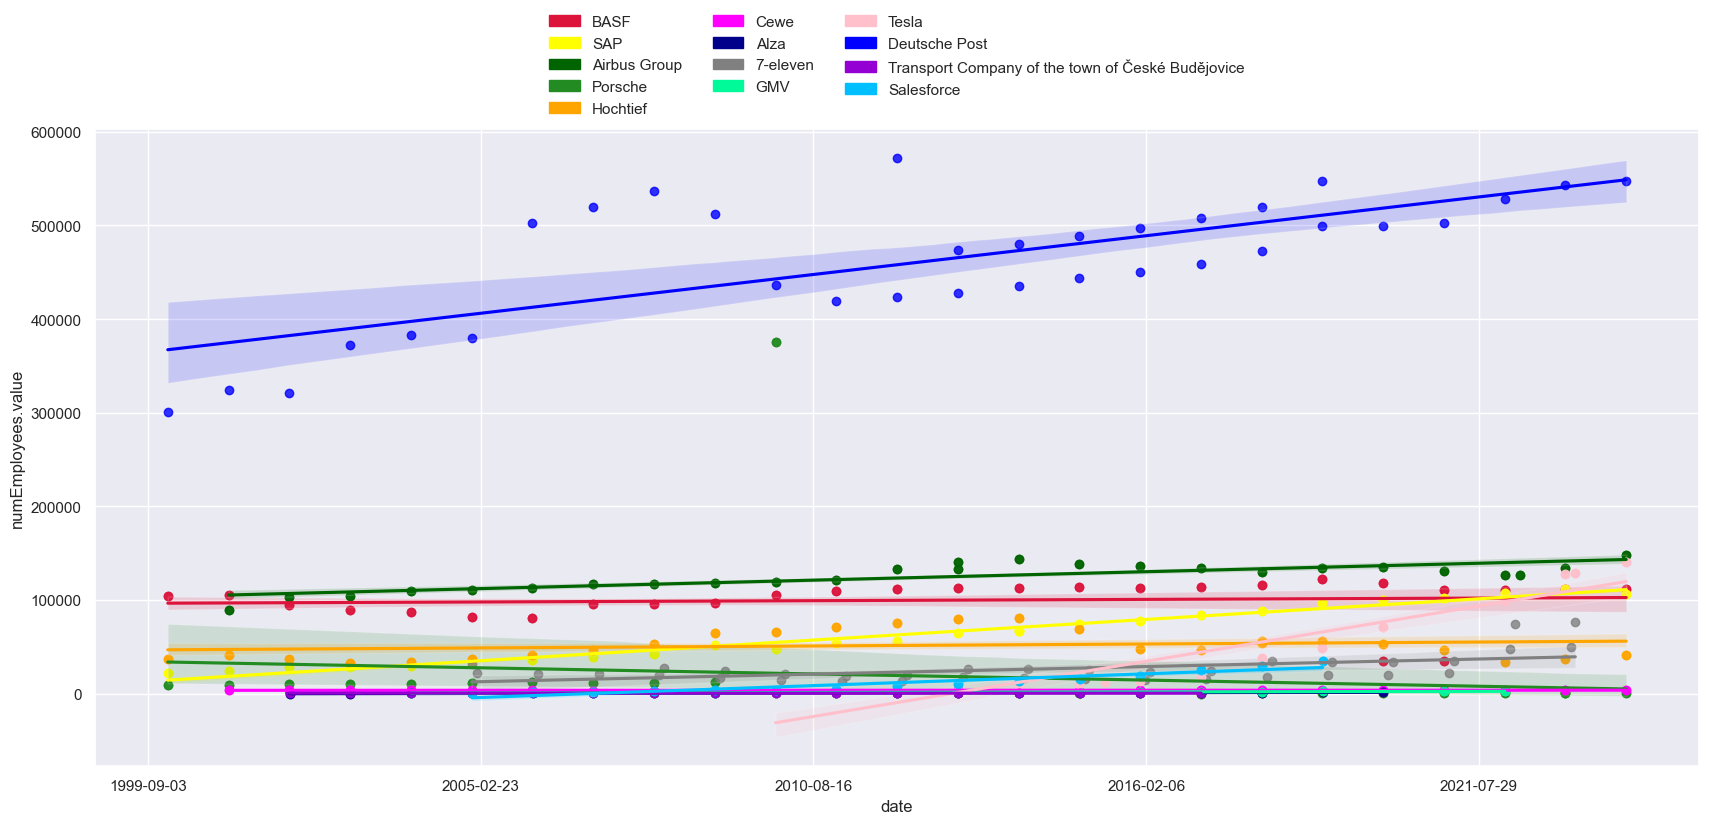

In [14]:
#create regression plot for all

from datetime import date

basf = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q9401")]
sap = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q552581")]
airbus = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q2311")]
porsche = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q2104551")]
hochtief = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q136542")]
cewe = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q1052186")]
finlayson = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q1329236")]
alza = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q10786832")]
seveneleven = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q17221821")]
gmv = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q1550912")]
tesla = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q478214")]  
deutschepost = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q157645")]
csekebudejovice = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q15123983")]
salesforce = company_data.loc[(company_data['company.value'] == "http://www.wikidata.org/entity/Q941127")]

basf['date_ordinal'] = pd.to_datetime(basf['date']).apply(lambda date: date.toordinal())
sap['date_ordinal'] = pd.to_datetime(sap['date']).apply(lambda date: date.toordinal())
airbus['date_ordinal'] = pd.to_datetime(airbus['date']).apply(lambda date: date.toordinal())
porsche['date_ordinal'] = pd.to_datetime(porsche['date']).apply(lambda date: date.toordinal())
hochtief['date_ordinal'] = pd.to_datetime(hochtief['date']).apply(lambda date: date.toordinal())
cewe['date_ordinal'] = pd.to_datetime(cewe['date']).apply(lambda date: date.toordinal())
#finlayson['date_ordinal'] = pd.to_datetime(finlayson['date']).apply(lambda date: date.toordinal())
alza['date_ordinal'] = pd.to_datetime(alza['date']).apply(lambda date: date.toordinal())
seveneleven['date_ordinal'] = pd.to_datetime(seveneleven['date']).apply(lambda date: date.toordinal())
gmv['date_ordinal'] = pd.to_datetime(gmv['date']).apply(lambda date: date.toordinal())
tesla['date_ordinal'] = pd.to_datetime(tesla['date']).apply(lambda date: date.toordinal())
deutschepost['date_ordinal'] = pd.to_datetime(deutschepost['date']).apply(lambda date: date.toordinal())
csekebudejovice['date_ordinal'] = pd.to_datetime(csekebudejovice['date']).apply(lambda date: date.toordinal())
salesforce ['date_ordinal'] = pd.to_datetime(salesforce ['date']).apply(lambda date: date.toordinal())

ax=sns.regplot(x = basf['date_ordinal'], y = basf['numEmployees.value'], color='crimson')
sns.regplot(x = sap['date_ordinal'], y = sap['numEmployees.value'], color='yellow')
sns.regplot(x = airbus['date_ordinal'], y = airbus['numEmployees.value'], color='darkgreen')
sns.regplot(x = porsche['date_ordinal'], y = porsche['numEmployees.value'], color='forestgreen')
sns.regplot(x = hochtief['date_ordinal'], y = hochtief['numEmployees.value'], color='orange')
sns.regplot(x = cewe['date_ordinal'], y = cewe['numEmployees.value'], color='magenta')
#sns.regplot(x = finlayson['date_ordinal'], y = finlayson['numEmployees.value'], color='goldenrod')
sns.regplot(x = alza['date_ordinal'], y = alza['numEmployees.value'], color='darkblue')
sns.regplot(x = seveneleven['date_ordinal'], y = seveneleven['numEmployees.value'], color='gray')
sns.regplot(x = gmv['date_ordinal'], y = gmv['numEmployees.value'], color='mediumspringgreen')
sns.regplot(x = tesla['date_ordinal'], y = tesla['numEmployees.value'], color='pink')
sns.regplot(x = deutschepost['date_ordinal'], y = deutschepost['numEmployees.value'], color='blue')
sns.regplot(x = csekebudejovice['date_ordinal'], y = csekebudejovice['numEmployees.value'], color='darkviolet')
sns.regplot(x = salesforce['date_ordinal'], y = salesforce['numEmployees.value'], color='deepskyblue')

ax.set_xlabel('date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
basf_patch = mpatches.Patch(color='crimson', label='BASF')
sap_patch = mpatches.Patch(color='yellow', label='SAP')
airbus_patch = mpatches.Patch(color='darkgreen', label='Airbus Group')
porsche_patch = mpatches.Patch(color='forestgreen', label='Porsche')
hochtief_patch = mpatches.Patch(color='orange', label='Hochtief')
cewe_patch = mpatches.Patch(color='magenta', label='Cewe')
#finlayson_patch = mpatches.Patch(color='goldenrod', label='Finlayson')
alza_patch = mpatches.Patch(color='darkblue', label='Alza')
seveneleven_patch = mpatches.Patch(color='gray', label='7-eleven')
gmv_patch = mpatches.Patch(color='mediumspringgreen', label='GMV')
tesla_patch = mpatches.Patch(color='pink', label='Tesla')
deutschepost_patch = mpatches.Patch(color='blue', label='Deutsche Post')
csekebudejovice_patch = mpatches.Patch(color='darkviolet', label='Transport Company of the town of České Budějovice')
salesforce_patch = mpatches.Patch(color='deepskyblue', label='Salesforce')
ax.legend(handles=[basf_patch,sap_patch,airbus_patch,porsche_patch,hochtief_patch,cewe_patch,
                   alza_patch,seveneleven_patch, gmv_patch,tesla_patch,deutschepost_patch,csekebudejovice_patch,salesforce_patch])

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

In [15]:
# calculate slope

import numpy as np
from scipy import stats

x = np.array(basf['date_ordinal']) 
y = np.array(basf['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

0.6893987100281697


In [16]:
x = np.array(sap['date_ordinal']) 
y = np.array(sap['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

11.02510105496131


In [17]:
x = np.array(airbus['date_ordinal']) 
y = np.array(airbus['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

4.5160539514247775


In [18]:
x = np.array(porsche['date_ordinal']) 
y = np.array(porsche['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

-3.2814499488719893


In [19]:
x = np.array(hochtief['date_ordinal']) 
y = np.array(hochtief['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

1.0528196583852347


In [20]:
x = np.array(cewe['date_ordinal']) 
y = np.array(cewe['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

0.01298277293182426


In [21]:
x = np.array(alza['date_ordinal']) 
y = np.array(alza['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

0.21682336354851636


In [22]:
x = np.array(seveneleven['date_ordinal']) 
y = np.array(seveneleven['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

4.036417605838014


In [23]:
x = np.array(gmv['date_ordinal']) 
y = np.array(gmv['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

0.2928508668567461


In [24]:
x = np.array(tesla['date_ordinal']) 
y = np.array(tesla['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

29.496971009310375


In [25]:
x = np.array(deutschepost['date_ordinal']) 
y = np.array(deutschepost['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

20.710559489423343


In [26]:
x = np.array(csekebudejovice['date_ordinal']) 
y = np.array(csekebudejovice['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

-0.013507620476443388


In [27]:
x = np.array(salesforce['date_ordinal']) 
y = np.array(salesforce['numEmployees.value'])

# Calculate slope using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(slope)

6.321605850074775
